<a href="https://colab.research.google.com/github/kartikgandhi/Computer-Vision/blob/main/OpenCV_FileWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Importing OpenCV & Reading an Image**

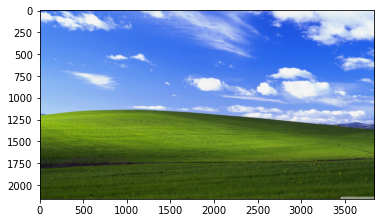

In [14]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread('/content/gdrive/MyDrive/xp.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

By default, the imread function reads images in the BGR (Blue-Green-Red) format. We can read images in different formats using extra flags in the imread function:

* cv2.IMREAD_COLOR: Default flag for loading a color image
* cv2.IMREAD_GRAYSCALE: Loads images in grayscale format
* cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel

**Changing Color Spaces**

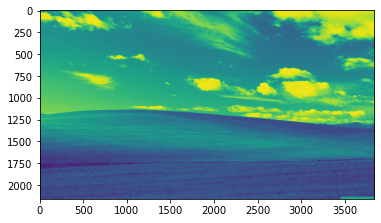

In [15]:
#converting image to Gray scale 
gray_image = cv2.cvtColor(cv2.imread('/content/gdrive/MyDrive/xp.jpg'),cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 

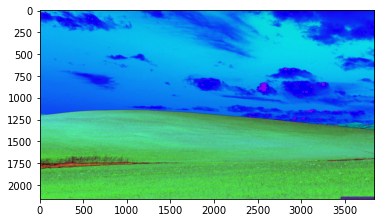

In [16]:
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

We know that grayscale images have single pixel values and color images contain 3 values for each pixel – the intensities of the Red, Green and Blue channels.

Most computer vision use cases process images in RGB format. However, applications like video compression and device independent storage – these are heavily dependent on other color spaces, like the Hue-Saturation-Value or HSV color space.

OpenCV reads a given image in the BGR format by default. So, you’ll need to change the color space of your image from BGR to RGB when reading images using OpenCV.

**Resizing Images**

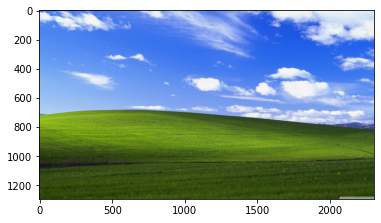

In [17]:
#downscale
scale = 60  # percent of original size  
width = int(image.shape[1] * scale / 100)  
height = int(image.shape[0] * scale / 100)  
dim = (width, height)  
smaller_image = cv2.resize(image,dim,interpolation=cv2.INTER_AREA) 
#plot the resized image
plt.imshow(smaller_image)

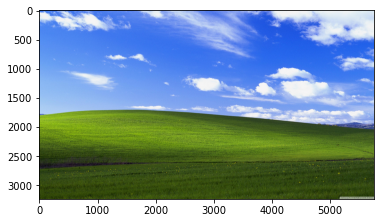

In [18]:
#upscale
scale = 150  # percent of original size  
width = int(image.shape[1] * scale / 100)  
height = int(image.shape[0] * scale / 100)  
dim = (width, height)  
larger_image = cv2.resize(image,dim,interpolation=cv2.INTER_AREA) 
#plot the resized image
plt.imshow(larger_image)

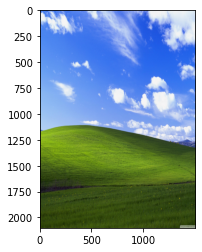

In [19]:
#resize
width = 1500
height = 2100
dim = (width, height)  
larger_image = cv2.resize(image,dim,interpolation=cv2.INTER_AREA) 
#plot the resized image
plt.imshow(larger_image)

Different Interpolation parameters:
1. INTER_NEAREST: Nearest neighbor interpolation
2. INTER_LINEAR: Bilinear interpolation
3. INTER_AREA: Resampling using pixel area relation
4. INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood
5. INTER_LANCZOS4: Lanczos interpolation over 8×8 neighborhood



**Image Rotation**

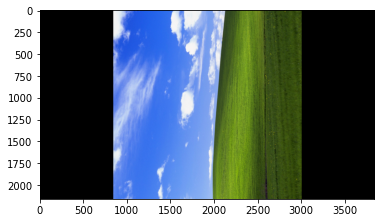

In [20]:
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

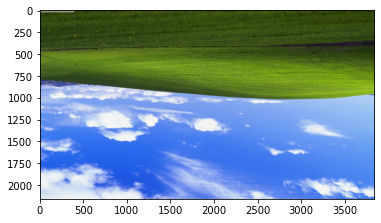

In [21]:
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

This method allows us to generate more samples for training our deep learning model. Data augmentation uses the available data samples to produce the new ones, by applying image operations like rotation, scaling, translation, etc. This makes our model robust to changes in input and leads to better generalization.

Rotation is one of the most used and easy to implement data augmentation techniques. As the name suggests, it involves rotating the image at an arbitrary angle and providing it the same label as the original image. Think of the times you have rotated images in your phone to achieve certain angles – that’s basically what this function does.

**Image Translation**

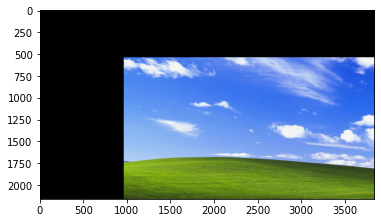

In [22]:
height, width = image.shape[:2]
quarter_height, quarter_width = height / 4, width / 4
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))

plt.imshow(img_translation)

To perform image translation with OpenCV, we first need to define a 2 x 3 matrix called an affine transformation matrix:

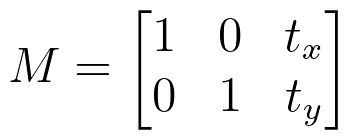

For the purposes of translation, all we care about are the t_{x} and t_y values:

Negative values for the t_{x} value will shift the image to the left
Positive values for  t_{x} shifts the image to the right
Negative values for  t_{y} shifts the image up
Positive values for  t_{y} will shift the image down

For example say we want to shift the image quarter to the height and width of image

**Drawing Functions**

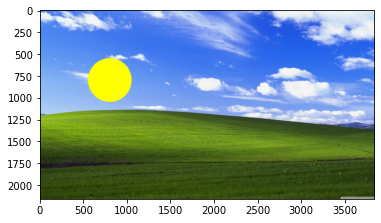

In [23]:
#circle
circle=cv2.circle(cv2.cvtColor(cv2.imread('/content/gdrive/MyDrive/xp.jpg'),cv2.COLOR_BGR2RGB),(800,800), 250, (255,255,0), -1)  
plt.imshow(circle)  

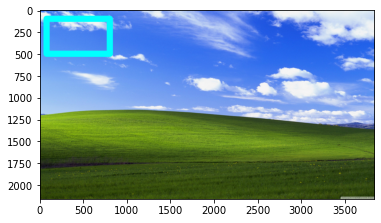

In [24]:
#rectangle
rectangle=cv2.rectangle(cv2.cvtColor(cv2.imread('/content/gdrive/MyDrive/xp.jpg'),cv2.COLOR_BGR2RGB),(75,100),(800,500),(0,255,255),70)  
plt.imshow(rectangle) 

We can draw the various shapes on an image such as circle, rectangle, ellipse, polylines, convex, etc. It is used when we want to highlight any object in the input image. The OpenCV provides functions for each shape. Here we will learn about the drawing functions.

Parameters:
* img- It represents the given image.
* center- Center of the circle
* radius- Radius of the circle
* color- Circle color
* thickness- It denotes the thickness of the circle outline, if it is positive. And negative thickness means that a filled circle is to be drawn.
* lineType- Defines the type of the circle boundary.
* shift- It represents the number of fractional bits in the coordinate of the center and the radius value.

**Simple Image Thresholding**

Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). 

Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold.

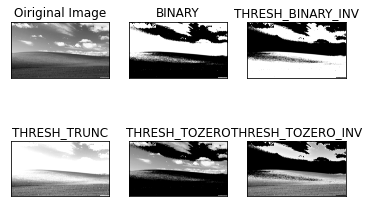

In [25]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread('/content/gdrive/MyDrive/xp.jpg',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Adaptive Thresholding**

In case of adaptive thresholding, different threshold values are used for different parts of the image. This function gives better results for images with varying lighting conditions – hence the term “adaptive”.

Otsu’s binarization method finds an optimal threshold value for the whole image. It works well for bimodal images (images with 2 peaks in their histogram).

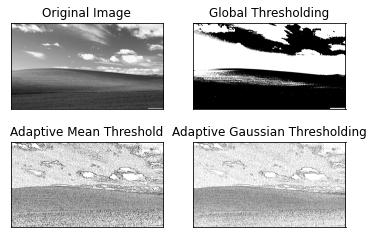

In [26]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#ADAPTIVE THRESHOLDING
gray_image = cv2.imread('/content/gdrive/MyDrive/xp.jpg',0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Edge Detection**

Edges are the points in an image where the image brightness changes sharply or has discontinuities. Such discontinuities generally correspond to:

* Discontinuities in depth
* Discontinuities in surface orientation
* Changes in material properties
* Variations in scene illumination

Edges are very useful features of an image that can be used for different applications like classification of objects in the image and localization. Even deep learning models calculate edge features to extract information about the objects present in image.

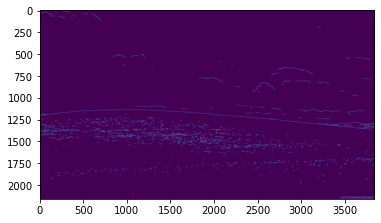

In [27]:
#import the required libraries
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
#read the image
image = cv2.imread('/content/gdrive/MyDrive/xp.jpg') 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

**Image Blurring**

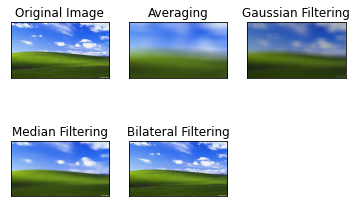

In [28]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('/content/gdrive/MyDrive/xp.jpg') 
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Averaging
avging = cv2.blur(image,(500,500))
   
# Gaussian Blurring
gausBlur = cv2.GaussianBlur(image, (555,555),0) 

# Median blurring
medBlur = cv2.medianBlur(image,155)

# Bilateral Filtering
bilFilter = cv2.bilateralFilter(image,9,175,175)

names = ['Original Image','Averaging','Gaussian Filtering','Median Filtering','Bilateral Filtering']
images = [image,avging,gausBlur,medBlur,bilFilter]

for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

In image filtering, a pixel value is updated using its neighbouring values

Well, there are multiple ways of updating pixel values, such as selecting the maximum value from neighbours, using the average of neighbours, etc. Each method has it’s own uses. For example, averaging the pixel values in a neighbourhood is used for image blurring.

Gaussian filtering is also used for image blurring that gives different weights to the neighbouring pixels based on their distance from the pixel under consideration.

For image filtering, we use kernels. Kernels are matrices of numbers of different shapes like 3 x 3, 5 x 5, etc. A kernel is used to calculate the dot product with a part of the image. When calculating the new value of a pixel, the kernel center is overlapped with the pixel. The neighbouring pixel values are multiplied with the corresponding values in the kernel. The calculated value is assigned to the pixel coinciding with the center of the kernel.

**Image Contours**

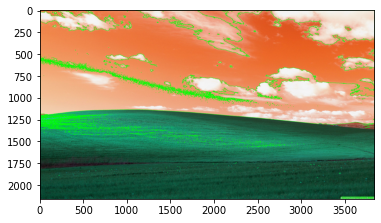

In [29]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 
image = cv2.imread('/content/gdrive/MyDrive/xp.jpg') 
#converting RGB image to Binary 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,150,255,cv2.THRESH_BINARY) 
plt.imshow(thresh)
#calculate the contours from binary image
contours,hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image_copy)

A contour is a closed curve of points or line segments that represents the boundaries of an object in the image. Contours are essentially the shapes of objects in an image.

Unlike edges, contours are not part of an image. Instead, they are an abstract collection of points and line segments corresponding to the shapes of the object(s) in the image.

We can use contours to count the number of objects in an image, categorize objects on the basis of their shapes, or select objects of particular shapes from the image.

**Histogram Equalization**

Histogram equalization is a basic image processing technique that can improve an image’s overall contrast. To enhance the image’s contrast, it spreads out the most frequent pixel intensity values or stretches out the intensity range of the image. By accomplishing this, histogram equalization allows the image’s areas with lower contrast to gain a higher contrast.
Histogram Equalization can be used when you have images that look washed out because they do not have sufficient contrast. In such photographs, the light and dark areas blend together creating a flatter image that lacks highlights and shadows.


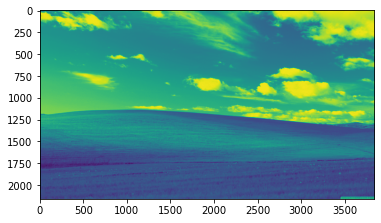

In [30]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/gdrive/MyDrive/xp.jpg',0) 
plt.imshow(image)


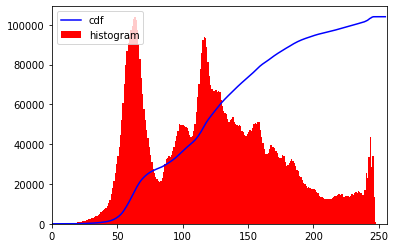

In [31]:
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

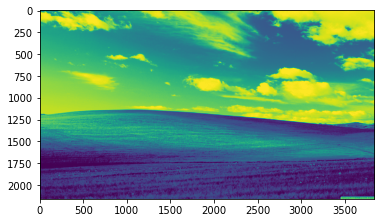

In [32]:
equ = cv.equalizeHist(image)
plt.imshow(equ)

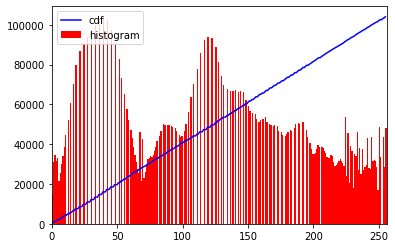

In [33]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()